In [1]:
#|default_exp app


# Cap Recognizer

> Add blockquote




In [12]:
!pip install -Uqq fastai gradio nbdev


In [3]:
from fastai.vision.all import *


In [4]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import pathlib
import os

# Fix PosixPath issue on Windows
pathlib.PosixPath = pathlib.WindowsPath

from fastai.learner import load_learner

model = load_learner('models/pitha-recognizer-v2.pkl')


In [9]:
#!export
pitha_labels = (
['Chit ruti Pitha',
 'Pata Pitha (Leaf-shaped Pitha)',
 'atikka pitha', 'bhapa pitha',
 'bibikhana pitha',
 'binni chaler pitha',
 'chitoi pitha',
 'choi pitha',
 'dim shundori pitha',
 'dudh chitoi pitha',
 'dudh puli pitha',
 'fuljhuri pitha',
 'jhinuk pitha',
 'khejur pitha',
 'mera pitha',
 'nokshi pitha',
 'patisapta pitha',
 'puli pitha',
 'semai pitha',
 'teler pitha']
)
def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(pitha_labels, map(float, probs)))

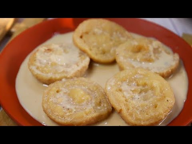

In [10]:
img = PILImage.create(f'test images/unknown_00.jpg')
img.thumbnail((192,192))
img


In [11]:
recognize_image(img)

<div><progress max="1" value="0"></progress> 0.00% [0/1 00:00&lt;?]</div>

TypeError: unsupported operand type(s) for +: 'PILImage' and 'dict'

In [12]:
#!export
# image = gr.inputs.Image(shape=(192,192))
# label = gr.outputs.Label()
# examples = [
#     'test images/unknown_00.jpg',
#     'test images/unknown_01.jpg',
#     'test images/unknown_02.jpg',
#     'test images/unknown_03.jpg'
#     ]
# iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
# iface.launch(inline=False)
import gradio as gr


image_input = gr.Image(type="pil")
label_output = gr.Label()


examples = [
    "test images/unknown_00.jpg",
    "test images/unknown_01.jpg",
    "test images/unknown_02.jpg",
    "test images/unknown_03.jpg",
]


iface = gr.Interface(
    fn=recognize_image,
    inputs=image_input,
    outputs=label_output,
    examples=examples
)


iface.launch(inline=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://05d125f2a6cf768604.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Notebook to Python Script Export


In [20]:
from nbdev.export import notebook2script


ImportError: cannot import name 'notebook2script' from 'nbdev.export' (/usr/local/lib/python3.12/dist-packages/nbdev/export.py)

In [15]:
notebook2script('app.ipynb.')

NameError: name 'notebook2script' is not defined